In [10]:
from data import MNIST
from mmdew_adapter import MMDEWAdapter
from mmdew.mmd import MMD

In [91]:
from sklearn import preprocessing
import numpy as np
def preprocess(x):
    return preprocessing.minmax_scale(x)
mnist = MNIST(preprocess=preprocess)

In [92]:

cps = mnist._change_points
true_cps = [i for i, x in enumerate(cps) if x]
fst_cps = true_cps[0]
snd_cps = true_cps[1]
thrd_cps = true_cps[2]
fst_cps
print(true_cps)

[6876, 13834, 20975, 28852, 35676, 42969, 49872, 56185, 63175]


In [13]:
cps[0]

False

In [14]:


mymmd=MMD(biased=True)


mmd_nys1 = MMDEWAdapter(1, alpha=1e-16)
pre_train_data = np.array(
                [mnist.next_sample()[0] for _ in range(100)]
            ).squeeze(1)
mmd_nys1.pre_train(data=pre_train_data)
mnist.restart() 

In [15]:
import pandas as pd
x1 = []
y1 = []
for i in range(snd_cps +1):
    valid = False   #print(i)
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys1.add_element(next_sample)
    mmd_vals = []
    if len(mmd_nys1.detector.buckets) > 1:
        for j in range(1, len(mmd_nys1.detector.buckets)):
            
            mmdcalc = mmd_nys1.detector.mmd(j)[0]
            mmd_vals.append(mmdcalc) 
        
        mmd_vals = np.array(mmd_vals)
        max_mmd = np.max(mmd_vals)
        valid = True
    bsstring = ""
    for k in range(0, len(mmd_nys1.detector.buckets)):
        bsstring += "(" + str(mmd_nys1.detector.buckets[k].uncompressed_capacity) + " " + str(len(mmd_nys1.detector.buckets[k].weights)) + ")"
    print(bsstring)
    x1.append(i)
    if not valid:
        y1.append(float("NaN"))
    else:

        y1.append(max_mmd)

(1 1)
(2 2)
(2 2)(1 1)
(4 2)
(4 2)(1 1)
(4 2)(2 2)
(4 2)(2 2)(1 1)
(8 3)
(8 3)(1 1)
(8 3)(2 2)
(8 3)(2 2)(1 1)
(8 3)(4 2)
(8 3)(4 2)(1 1)
(8 3)(4 2)(2 2)
(8 3)(4 2)(2 2)(1 1)
(16 4)
(16 4)(1 1)
(16 4)(2 2)
(16 4)(2 2)(1 1)
(16 4)(4 2)
(16 4)(4 2)(1 1)
(16 4)(4 2)(2 2)
(16 4)(4 2)(2 2)(1 1)
(16 4)(8 3)
(16 4)(8 3)(1 1)
(16 4)(8 3)(2 2)
(16 4)(8 3)(2 2)(1 1)
(16 4)(8 3)(4 2)
(16 4)(8 3)(4 2)(1 1)
(16 4)(8 3)(4 2)(2 2)
(16 4)(8 3)(4 2)(2 2)(1 1)
(32 6)
(32 6)(1 1)
(32 6)(2 2)
(32 6)(2 2)(1 1)
(32 6)(4 2)
(32 6)(4 2)(1 1)
(32 6)(4 2)(2 2)
(32 6)(4 2)(2 2)(1 1)
(32 6)(8 3)
(32 6)(8 3)(1 1)
(32 6)(8 3)(2 2)
(32 6)(8 3)(2 2)(1 1)
(32 6)(8 3)(4 2)
(32 6)(8 3)(4 2)(1 1)
(32 6)(8 3)(4 2)(2 2)
(32 6)(8 3)(4 2)(2 2)(1 1)
(32 6)(16 4)
(32 6)(16 4)(1 1)
(32 6)(16 4)(2 2)
(32 6)(16 4)(2 2)(1 1)
(32 6)(16 4)(4 2)
(32 6)(16 4)(4 2)(1 1)
(32 6)(16 4)(4 2)(2 2)
(32 6)(16 4)(4 2)(2 2)(1 1)
(32 6)(16 4)(8 3)
(32 6)(16 4)(8 3)(1 1)
(32 6)(16 4)(8 3)(2 2)
(32 6)(16 4)(8 3)(2 2)(1 1)
(32 6)(16 4)(8 3)(4 2)
(3

(32 6)(16 4)(8 3)(4 2)(2 2)
(32 6)(16 4)(8 3)(4 2)(2 2)(1 1)
(64 8)
(64 8)(1 1)
(64 8)(2 2)
(64 8)(2 2)(1 1)
(64 8)(4 2)
(64 8)(4 2)(1 1)
(64 8)(4 2)(2 2)
(64 8)(4 2)(2 2)(1 1)
(64 8)(8 3)
(64 8)(8 3)(1 1)
(64 8)(8 3)(2 2)
(64 8)(8 3)(2 2)(1 1)
(64 8)(8 3)(4 2)
(64 8)(8 3)(4 2)(1 1)
(64 8)(8 3)(4 2)(2 2)
(64 8)(8 3)(4 2)(2 2)(1 1)
(64 8)(16 4)
(64 8)(16 4)(1 1)
(64 8)(16 4)(2 2)
(64 8)(16 4)(2 2)(1 1)
(64 8)(16 4)(4 2)
(64 8)(16 4)(4 2)(1 1)
(64 8)(16 4)(4 2)(2 2)
(64 8)(16 4)(4 2)(2 2)(1 1)
(64 8)(16 4)(8 3)
(64 8)(16 4)(8 3)(1 1)
(64 8)(16 4)(8 3)(2 2)
(64 8)(16 4)(8 3)(2 2)(1 1)
(64 8)(16 4)(8 3)(4 2)
(64 8)(16 4)(8 3)(4 2)(1 1)
(64 8)(16 4)(8 3)(4 2)(2 2)
(64 8)(16 4)(8 3)(4 2)(2 2)(1 1)
(64 8)(32 6)
(64 8)(32 6)(1 1)
(64 8)(32 6)(2 2)
(64 8)(32 6)(2 2)(1 1)
(64 8)(32 6)(4 2)
(64 8)(32 6)(4 2)(1 1)
(64 8)(32 6)(4 2)(2 2)
(64 8)(32 6)(4 2)(2 2)(1 1)
(64 8)(32 6)(8 3)
(64 8)(32 6)(8 3)(1 1)
(64 8)(32 6)(8 3)(2 2)
(64 8)(32 6)(8 3)(2 2)(1 1)
(64 8)(32 6)(8 3)(4 2)
(64 8)(32 6)(8 3)(4 

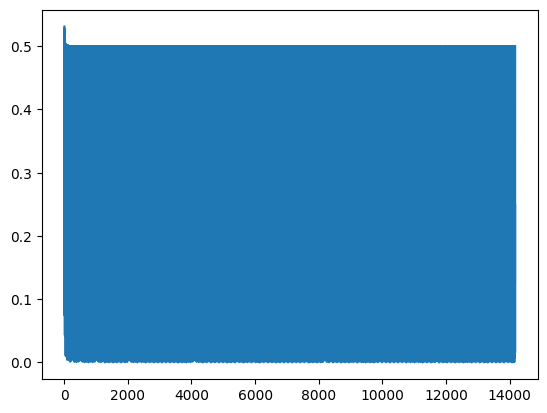

In [27]:
import matplotlib.pyplot as plt
x1_np = np.array(range(snd_cps +1))
y1_np = np.array(y1)
# def convert_to_float(s):
#     if s == 'nan':
#         return np.nan
#     else:
#         # Extract the first value from the tuple-like string
#         float_val = float(s.split(',')[0].strip('('))
#         return float_val
x1_np_odd = x1_np[1::2]
y1_np_odd = y1_np[1::2]

plt.plot(x1_np_odd,y1_np_odd)
plt.show()


In [24]:
y1

[nan,
 nan,
 1.2499999999998659,
 nan,
 1.1249999962498884,
 0.37499999624988845,
 1.0833333316666172,
 nan,
 1.0312499990624722,
 0.5312499890622936,
 1.039999998999975,
 0.1562499940623829,
 1.0277777768055332,
 0.5277777668054888,
 1.0306122439795746,
 nan,
 1.0117187494531166,
 0.26171874945311663,
 1.0123456785802403,
 0.07421874820311668,
 1.0099999995999946,
 0.25999999587463735,
 1.0103305781510257,
 0.04296874828277208,
 1.008680555182458,
 0.5086805451824582,
 1.0103550292087216,
 0.13368055018245817,
 1.008928571052418,
 0.5089285610524183,
 1.0099999996278843,
 nan,
 1.0029296873000935,
 0.2529296835747363,
 1.0034602074224865,
 0.12792968386873754,
 1.0038580244910449,
 0.25385802449104483,
 1.004155124473957,
 0.04980468519224903,
 1.0037499997877461,
 0.5037499897875676,
 1.0045351471770936,
 0.1287499960377462,
 1.0041322311985506,
 0.5041322211984613,
 1.0047258977128513,
 0.010742186734836297,
 1.0021701387372353,
 0.2521701387372352,
 1.002399999860236,
 0.1271701349

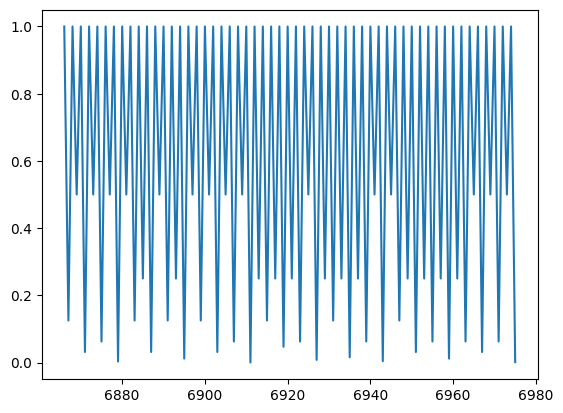

In [28]:

plt.plot(x1_np[fst_cps-10:fst_cps+100],y1_np[fst_cps-10:fst_cps+100])
plt.show()

Ok, lets try to understand what is happening here. Lets insert exactly the dapapoints until the first changepoint. Let us then individually look at mmd after each insert.

In [29]:
mnist.restart()
mmd_nys2 = MMDEWAdapter(1, alpha=1e-16)
mmd_nys2.pre_train(data=pre_train_data)
x2 = []
y2 = []
for i in range(snd_cps +1):
    valid = False   #print(i)
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys2.add_element(next_sample)
    mmd_vals = []
    if len(mmd_nys2.detector.buckets) > 1:
        
   
        mmd = mmd_nys2.detector.mmd(1)
        valid = True
    bsstring = ""
    for k in range(0, len(mmd_nys2.detector.buckets)):
        bsstring += "(" + str(mmd_nys2.detector.buckets[k].uncompressed_capacity) + " " + str(len(mmd_nys2.detector.buckets[k].weights)) + ")"
    print(bsstring)
    x2.append(i)
    if not valid:
        y2.append(float("NaN"))
    else:

        y2.append(max_mmd)
    

(1 1)
(2 2)
(2 2)(1 1)
(4 2)
(4 2)(1 1)
(4 2)(2 2)
(4 2)(2 2)(1 1)
(8 3)
(8 3)(1 1)
(8 3)(2 2)
(8 3)(2 2)(1 1)
(8 3)(4 2)
(8 3)(4 2)(1 1)
(8 3)(4 2)(2 2)
(8 3)(4 2)(2 2)(1 1)
(16 4)
(16 4)(1 1)
(16 4)(2 2)
(16 4)(2 2)(1 1)
(16 4)(4 2)
(16 4)(4 2)(1 1)
(16 4)(4 2)(2 2)
(16 4)(4 2)(2 2)(1 1)
(16 4)(8 3)
(16 4)(8 3)(1 1)
(16 4)(8 3)(2 2)
(16 4)(8 3)(2 2)(1 1)
(16 4)(8 3)(4 2)
(16 4)(8 3)(4 2)(1 1)
(16 4)(8 3)(4 2)(2 2)
(16 4)(8 3)(4 2)(2 2)(1 1)
(32 6)
(32 6)(1 1)
(32 6)(2 2)
(32 6)(2 2)(1 1)
(32 6)(4 2)
(32 6)(4 2)(1 1)
(32 6)(4 2)(2 2)
(32 6)(4 2)(2 2)(1 1)
(32 6)(8 3)
(32 6)(8 3)(1 1)
(32 6)(8 3)(2 2)
(32 6)(8 3)(2 2)(1 1)
(32 6)(8 3)(4 2)
(32 6)(8 3)(4 2)(1 1)
(32 6)(8 3)(4 2)(2 2)
(32 6)(8 3)(4 2)(2 2)(1 1)
(32 6)(16 4)
(32 6)(16 4)(1 1)
(32 6)(16 4)(2 2)
(32 6)(16 4)(2 2)(1 1)
(32 6)(16 4)(4 2)
(32 6)(16 4)(4 2)(1 1)
(32 6)(16 4)(4 2)(2 2)
(32 6)(16 4)(4 2)(2 2)(1 1)
(32 6)(16 4)(8 3)
(32 6)(16 4)(8 3)(1 1)
(32 6)(16 4)(8 3)(2 2)
(32 6)(16 4)(8 3)(2 2)(1 1)
(32 6)(16 4)(8 3)(4 2)
(3

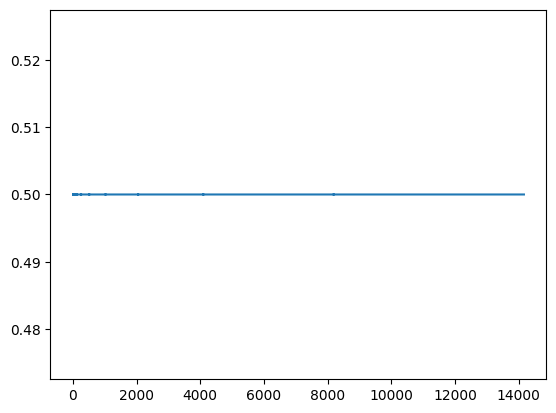

In [30]:
import matplotlib.pyplot as plt
x2_np = np.array(range(snd_cps +1))
y2_np = np.array(y2)
# def convert_to_float(s):
#     if s == 'nan':
#         return np.nan
#     else:
#         # Extract the first value from the tuple-like string
#         float_val = float(s.split(',')[0].strip('('))
#         return float_val


plt.plot(x2_np,y2_np)
plt.show()


In [93]:
mnist.restart()
mmd_test_x = []
mmd_test_y = []
for i in range(snd_cps):
    if i < fst_cps:
        next_sample, _, is_change = mnist.next_sample()
        mmd_test_x.append(next_sample)
    else:
        next_sample, _, is_change = mnist.next_sample()
        mmd_test_y.append(next_sample)
mmd_test_x = np.array(mmd_test_x).reshape(fst_cps, -1)
mmd_test_y = np.array(mmd_test_y).reshape(snd_cps - fst_cps, -1)
print(mmd_test_x.shape)

mymmd.mmd(mmd_test_x,mmd_test_y)


(6876, 784)


0.00028919139624440963

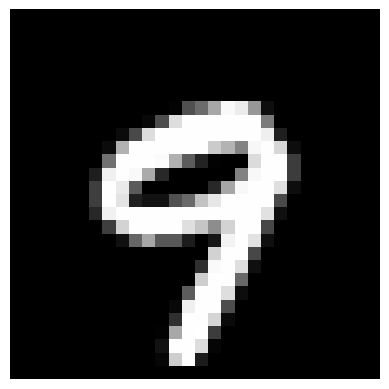

In [96]:
image = mmd_test_y[2].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
bsstring = ""
for j in range(0, len(mmd_nys.detector.buckets)):
    bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
print(bsstring)
mmd_nys.detector.mmd(6)

(4096 64)(2048 46)(512 23)(128 12)(16 4)(4 2)(1 1)


(1.0000015984647133, 6804, 1)

In [ ]:
def getSplitAndPrint():
    split = 1
    ucap_sum = 0
    bucket_index = 0
    finished = False
    while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
        #print("hello")
        ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity

        if ucap_sum <= fst_cps-1:

            split = bucket_index + 1
            bucket_index += 1
        else:
            finished = True
    bsstring = ""
    for j in range(0, len(mmd_nys.detector.buckets)):
        bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
    print("state:", bsstring)
    print(split)
    return split

def addElement():
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys.add_element(next_sample)

In [ ]:
addElement()
print(mmd_nys.detector.mmd(getSplitAndPrint()))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(1 1)
6
(1.0000016105832223, 6824, 1)


In [ ]:
addElement()
print(mmd_nys.detector.mmd(getSplitAndPrint()))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(2 2)
6
(0.5000016005832225, 6824, 2)


In [ ]:
addElement()
print(mmd_nys.detector.mmd(getSplitAndPrint()))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(2 2)(1 1)
6
(0.3333349394721112, 6824, 3)


In [ ]:
addElement()
print(mmd_nys.detector.mmd(getSplitAndPrint()))

(4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)
6
(0.12500160683322237, 6824, 4)


In [ ]:
for i in range(4):
    addElement()
    print(mmd_nys.detector.mmd(getSplitAndPrint()))

state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)(1 1)
6
(0.12000160818322234, 6824, 5)
state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)(2 2)
6
(0.11111271891655565, 6824, 6)
state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(8 3)(4 2)(2 2)(1 1)
6
(0.10204242486893658, 6824, 7)
state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(16 4)
5
(0.011720342265288296, 6816, 16)


In [ ]:
[i for i, x in enumerate(mnist._change_points) if x]

[6825, 13783, 20773, 27597, 34738, 41614, 47927, 54830, 62123]

In [ ]:
addElement()
print(mmd_nys.detector.mmd(getSplitAndPrint()))

state: (4096 64)(2048 46)(512 23)(128 12)(32 6)(16 4)(1 1)
5
(0.013842422780884607, 6816, 17)


In [ ]:
mmd_nys.detector.mmd(5)

(0.013842422780884607, 6816, 17)

Ok, so we are about to add the

In [ ]:
print(y_np[100:])



[           nan            nan            nan ... 2.94488967e-06
 2.97605601e-06 2.91126273e-06]


In [ ]:
k = y_np[10000].split(",")

AttributeError: 'numpy.float64' object has no attribute 'split'

In [ ]:
y_np[1000]

'nan'

In [ ]:
k[0][1:]

'1.1976957441986184e-05'

In [ ]:
float(k[0][1:])

1.1976957441986184e-05